# Adversarial Robustness in Vision-Based Robot Navigation

## Part 1: Dataset Preparation

This notebook prepares a subset of nuScenes dataset (400 front camera images) for adversarial attack experiments on object detection models.

In [1]:
# %pip install torch torchvision torchaudio
# %pip install numpy opencv-python ultralytics matplotlib seaborn Pillow tqdm pandas scikit-learn wget

In [2]:
# Essential imports
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
random.seed(42)

# Check device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


## Verify nuScenes Dataset

In [3]:
# Verify nuScenes installation
samples_dir = 'data/v1.0-mini/samples/CAM_FRONT'
if os.path.exists(samples_dir):
    images = [f for f in os.listdir(samples_dir) if f.endswith('.jpg')]
    print(f"✅ Found {len(images)} front camera images")
else:
    print("❌ CAM_FRONT folder not found!")

✅ Found 404 front camera images


## Create Dataset Class

In [4]:
# Dataset class for loading nuScenes images
class SimpleNavigationDataset:
    def __init__(self, num_images=400):
        self.samples_dir = 'data/v1.0-mini/samples/CAM_FRONT'
        self.target_size = (640, 640)
        self.images = sorted([f for f in os.listdir(self.samples_dir) if f.endswith('.jpg')])[:num_images]
        print(f"Dataset ready with {len(self.images)} images")
    
    def load_image(self, idx):
        """Load and resize image"""
        img_path = os.path.join(self.samples_dir, self.images[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, self.target_size)
        return img / 255.0, img_path  # Normalize to [0,1]
    
    def __len__(self):
        return len(self.images)

# Create dataset
dataset = SimpleNavigationDataset(num_images=400)

Dataset ready with 400 images


## Visualize Sample Images

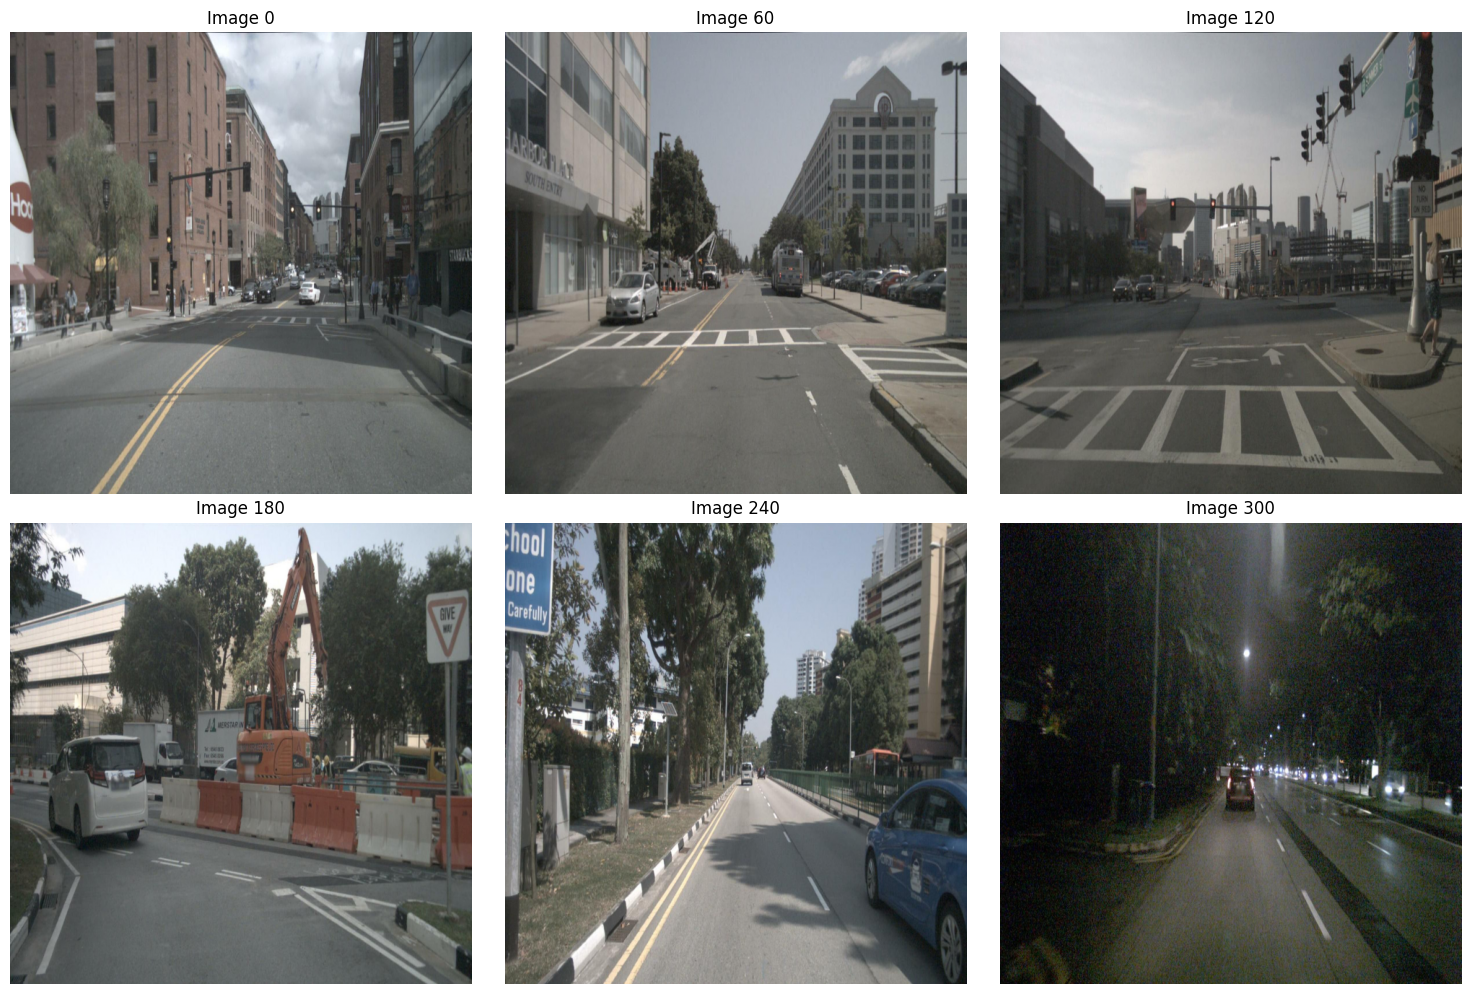

In [5]:
# Visualize some sample images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i in range(6):
    img, path = dataset.load_image(i * 60)  # Sample every 60th image
    axes[i].imshow(img)
    axes[i].set_title(f"Image {i * 60}")
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('experiments/visualizations/sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

## Summary

Dataset prepared:
- ✅ 400 front camera images from nuScenes mini
- ✅ Images resized to 640×640 and normalized to [0,1]
- ✅ Ready for object detection and adversarial attacks

Next: Load object detection models and implement attacks